# Partie 2 : analyse descriptive

On importe trois modules qui vont nous servir pour réaliser des graphiques.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd

sns.set_style("darkgrid", {"axes.facecolor": ".9"}) #Choix du style de fond de nos graphiques

On importe le fichier de données créé dans la partie 1 : 

In [2]:
parisiens = pd.read_csv('/Users/victorhuynh/Documents/ENSAE/ENSAE 2A/2A S1/PDS/Projet/table_finale.csv', sep = ";")

In [3]:
parisiens_avec_prix = parisiens[parisiens['Prix moyen'].notna()] 
# On crée un dataframe secondaire où l'on retire tous les restaurants pour lequels on n'a pas de 
# valeur quantitative : il nous servira à certaines étapes
display(parisiens_avec_prix.sort_values('Prix moyen').tail(5))

,legalImmat,streetNumber,streetName,Code Postal,city,isHeadquarters,legalName,legalStructure,employeesNb,categorySize,...,Note Globale,Catégorie de prix,Note de cuisine,Note de service,Note qualité-prix,Note ambiance,Nombre avis,Prix inf,Prix sup,Prix moyen
11241,530403146,68.0,RUE MANIN,75019,PARIS 19,1,LE PLAZZA,EURL,6.0,PME,...,"4,5",élevé,4.5,4.5,3.5,4.5,830.0,210.0,395.0,302.5
12687,410276026,87.0,AVENUE DE FLANDRE,75019,PARIS 19,1,COZUMEL,SARL,20.0,PME,...,4,moyen,4.5,4.5,4.0,4.5,94.0,107.0,661.0,384.0
10879,811642396,26.0,AVENUE CORENTIN CARIOU,75019,PARIS 19,1,A LA FOLIE,SAS,10.0,NaN,...,3,moyen,3.0,3.0,3.0,NaN,113.0,1982.0,3097.0,2539.5
1675,414117457,19.0,RUE DU FBG ST ANTOINE,75011,PARIS 11,1,FOLIE'S GRILL,SARL,10.0,PME,...,3,moyen,3.0,3.0,3.0,NaN,113.0,1992.0,3243.0,2617.5
12166,789149705,15.0,RUE DES ARCHIVES,75004,PARIS 4,1,NAGOYA,SARL,6.0,PME,...,4,moyen,4.5,4.0,3.5,NaN,57.0,2999.0,9999.0,6499.0


On remarque que 3 restaurants ont des prix moyens aberrants (les prix affichés sur TripAdvisor sont faux). On va donc les retirer de notre base de données pour éviter qu'ils faussent les moyennes que nous calculerons.

In [4]:
parisiens = parisiens.drop([10879,1675,12166], axis=0).reset_index(drop = True)
parisiens_avec_prix = parisiens_avec_prix.drop([10879,1675,12166], axis=0).reset_index(drop = True)

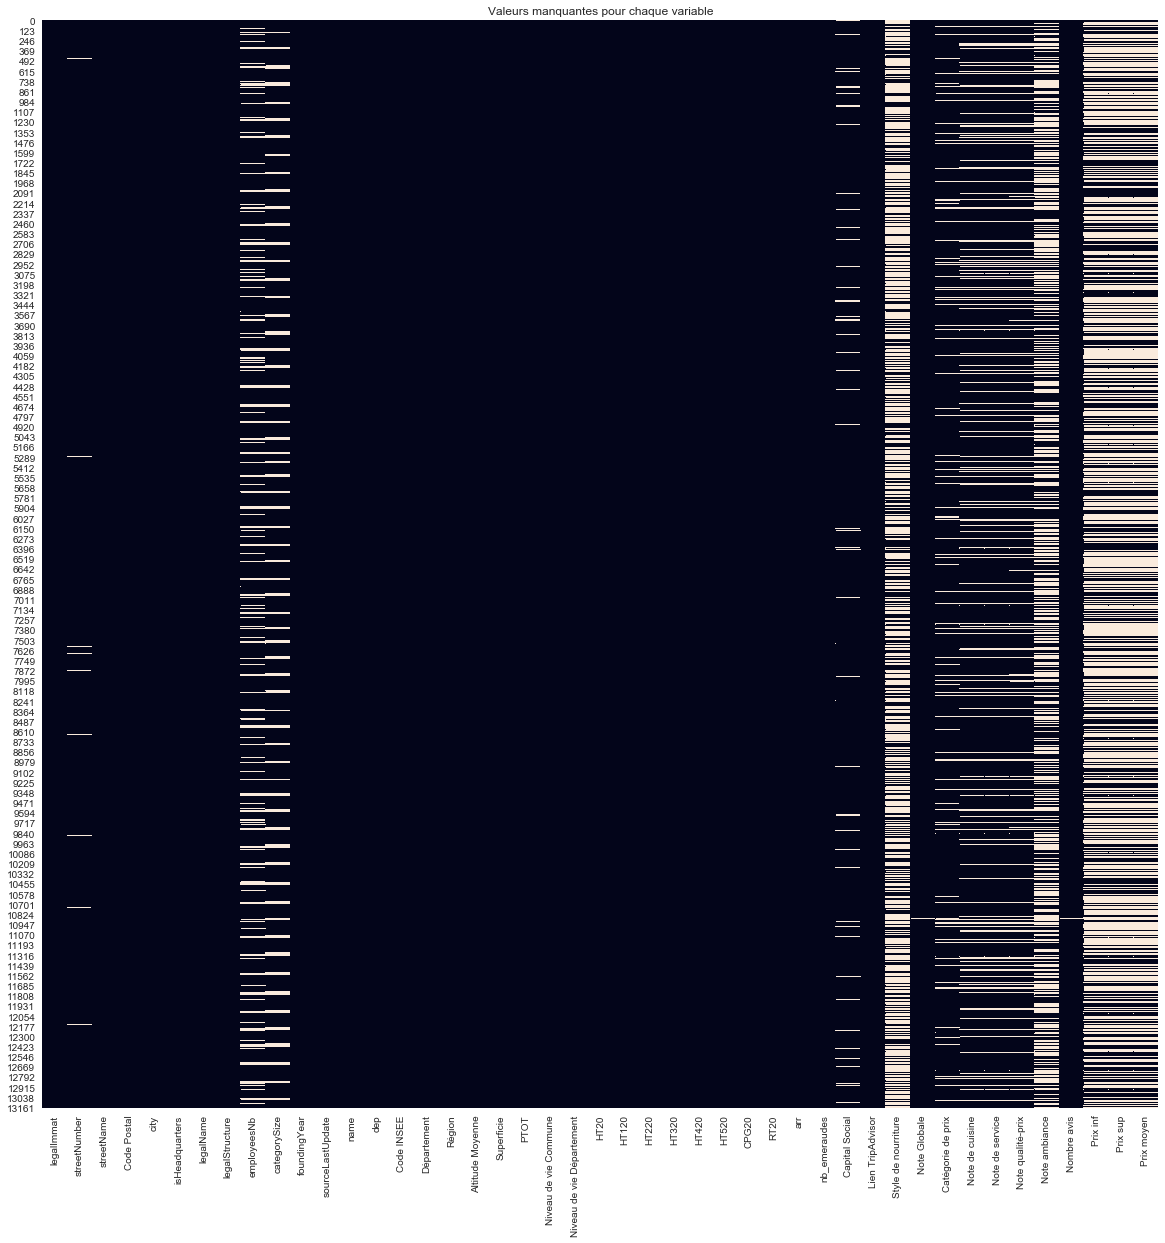

In [5]:
plt.figure(figsize=(20,20))
plt.title("Valeurs manquantes pour chaque variable")
sns.heatmap(parisiens.isna(), cbar=False)

Les valeurs manquantes sont essentiellement le prix moyen (c'est surtout la catégorie de prix qu'on a réussi à avoir en grand nombre), le style de nourriture et la note d'ambiance.

Voyons combien de restaurants nous avons dans chaque catégorie de prix dans notre base de données. 

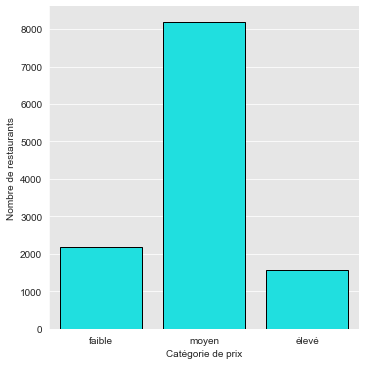

In [6]:
df = parisiens.groupby('Catégorie de prix').aggregate({'name':'count'}).reset_index()
df = df.rename(columns={'name': 'Nombre de restaurants'})
sns.catplot(x='Catégorie de prix', y='Nombre de restaurants', edgecolor="black", data=df,kind = "bar", color = "cyan")

On a une grosse majorité de restaurants avec un prix "moyen". Cependant, la variable "Catégorie de prix" n'est pas très précise : on ne visualise pas le prix directement à partir de cette dernière. 

In [7]:
parisiens.describe()

,legalImmat,streetNumber,Code Postal,isHeadquarters,employeesNb,foundingYear,dep,Code INSEE,Altitude Moyenne,Superficie,...,nb_emeraudes,Capital Social,Note de cuisine,Note de service,Note qualité-prix,Note ambiance,Nombre avis,Prix inf,Prix sup,Prix moyen
count,1.327600e+04,13171.000000,13276.000000,13276.000000,10946.000000,13276.000000,13276.0,13276.000000,13276.00000,13276.000000,...,13276.000000,1.275700e+04,11268.000000,11260.000000,11205.000000,6770.000000,13268.000000,5726.000000,5726.000000,5726.000000
mean,5.900142e+08,50.957255,75011.079090,0.882419,33.645807,2005.712489,75.0,75111.079090,45.60470,521.013709,...,2.228457,8.169369e+05,4.055112,4.038988,3.855154,3.837149,297.739599,19.025498,44.144778,31.585138
std,1.697515e+08,57.467926,5.476985,0.322123,248.930585,11.624008,0.0,5.476985,10.88604,398.762050,...,1.121140,7.355135e+06,0.547372,0.562734,0.577833,0.487274,713.561451,19.469310,43.416152,30.241170
min,3.007735e+08,1.000000,75001.000000,0.000000,0.000000,1900.000000,75.0,75101.000000,33.00000,99.000000,...,0.000000,1.000000e+00,1.000000,1.000000,1.500000,1.500000,0.000000,1.000000,2.000000,1.500000
25%,4.495697e+08,12.000000,75007.000000,1.000000,1.000000,2002.000000,75.0,75107.000000,40.00000,218.000000,...,2.000000,4.039890e+03,4.000000,3.500000,3.500000,3.500000,28.000000,9.000000,20.000000,15.000000
50%,5.211730e+08,31.000000,75011.000000,1.000000,3.000000,2009.000000,75.0,75111.000000,43.00000,385.000000,...,2.000000,7.774900e+03,4.000000,4.000000,4.000000,4.000000,108.000000,13.000000,30.000000,22.000000
75%,7.982447e+08,69.000000,75016.000000,1.000000,6.000000,2013.000000,75.0,75116.000000,46.00000,604.000000,...,3.000000,1.000000e+04,4.500000,4.500000,4.500000,4.000000,318.000000,21.000000,50.000000,35.000000
max,9.672000e+08,546.000000,75020.000000,1.000000,6700.000000,2017.000000,75.0,75120.000000,80.00000,1641.000000,...,4.000000,1.341044e+08,5.000000,5.000000,5.000000,5.000000,18978.000000,260.000000,661.000000,384.000000


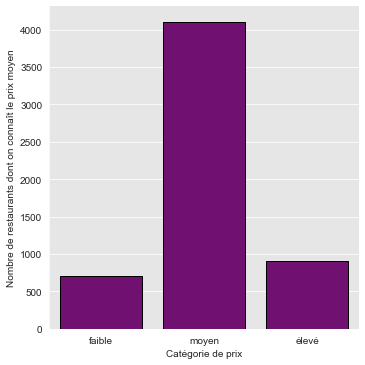

In [8]:
df = parisiens_avec_prix.groupby('Catégorie de prix').aggregate({'name':'count'}).reset_index()
df = df.rename(columns={'name': 'Nombre de restaurants dont on connaît le prix moyen'})
sns.catplot(x='Catégorie de prix', y='Nombre de restaurants dont on connaît le prix moyen', edgecolor="black", data=df,kind = "bar", color = "purple")

Avec nos données, le prix moyen du restaurant Parisien est de 31.58€, avec un écart-type de 30.24€. Cela semble élevé, et peut s'expliquer par le fait que les restaurants chers tirent la moyenne de prix vers le haut. Ainsi, le prix médian, 22€ semble déjà plus raisonnable.

De plus, comme le graphique ci-dessus nous montre, parmi les restaurants dont on connaît le prix moyen, on a très peu de restaurants dont la catégorie de prix "faible". Cela explique pourquoi la moyenne et le prix médian sont plus élevés que ce à quoi l'on peut s'attendre.

Le graphique ci-dessous nous rassure et nous montre qu'une grosse majorité des restaurants a bien un prix raisonnable, inférieur à 30€.

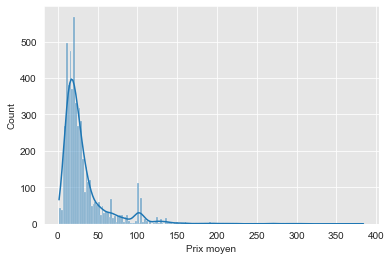

In [9]:
sns.histplot(parisiens['Prix moyen'], kde = True)

## Etude de l'effet de certaines variables sur la catégorie de prix d'un restaurant

### Note globale

In [10]:
parisiens['Note Globale'] = parisiens['Note Globale'].str.replace(",", ".").astype(float)

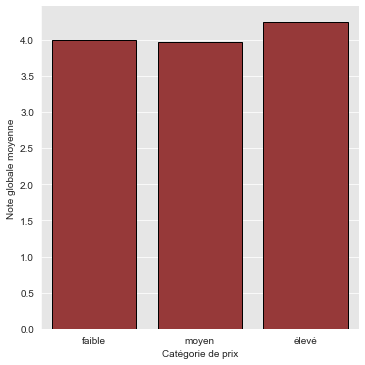

In [11]:
df = parisiens.groupby('Catégorie de prix').aggregate({'Note Globale' : 'mean'}).reset_index()
df = df.rename(columns={'Note Globale': 'Note globale moyenne'})
sns.catplot(x='Catégorie de prix', y='Note globale moyenne', edgecolor="black", data=df,kind = "bar", color = "brown")

Les restaurants les plus chers ont en moyenne une meilleure note globale. La note moyenne des restaurants bon marché et modérés sont quasiment égales, et ce pour deux raisons possibles : 
- la note globale est la moyenne de toutes les autres notes du restaurant sur TripAdvisor, donc elle se stabilise autour d'une même valeur pour de nombreux restaurants.
- la frontière entre catégorie de prix "faible" et "moyenne" est assez floue.

### Nombre d'avis

Calculons la moyenne de nombre d'avis d'un restaurant par catégorie de prix :

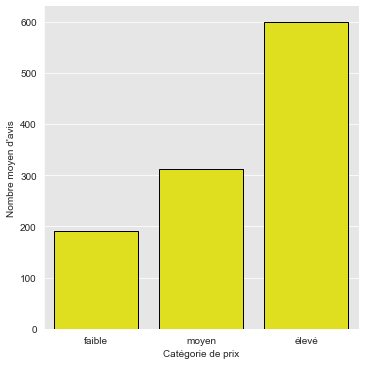

In [12]:
df = parisiens.groupby('Catégorie de prix').aggregate({'Nombre avis' : 'mean'}).reset_index()
df = df.rename(columns={'Nombre avis': "Nombre moyen d'avis"})
sns.catplot(x='Catégorie de prix', y="Nombre moyen d'avis", edgecolor="black", data=df,kind = "bar", color = "yellow")

Plus un restaurant est dans une catégorie de prix élevée, plus il a d'avis. En effet, le nombre d'avis traduit la popularité d'un restaurant : sa reconnaissance peut être gage de qualité, ainsi, les restaurants plus populaires et fréquentés sont plus chers.

La différence de nombre moyen d'avis entre chaque catégorie montre qu'il s'agit d'un indicateur très significatif du prix.

### Notes sur TripAdvisor

In [13]:
display(parisiens.groupby('Catégorie de prix').aggregate({'Note de cuisine' : 'mean'}))
display(parisiens.groupby('Catégorie de prix').aggregate({'Note de service' : 'mean'}))
display(parisiens.groupby('Catégorie de prix').aggregate({'Note qualité-prix' : 'mean'}))
display(parisiens.groupby('Catégorie de prix').aggregate({'Note ambiance' : 'mean'}))

,Note de cuisine
Catégorie de prix,
faible,4.047363
moyen,4.013497
élevé,4.314589


,Note de service
Catégorie de prix,
faible,3.998114
moyen,4.014690
élevé,4.252892


,Note qualité-prix
Catégorie de prix,
faible,4.114967
moyen,3.809877
élevé,3.791318


,Note ambiance
Catégorie de prix,
faible,3.685972
moyen,3.826515
élevé,4.015206


Plus un restaurant est cher, plus sa note d'ambiance est élevée : l'ambiance dans un restaurant est un point clé pour les parisiens, on peut le voir à travers l'ouverture de restaurants insolites ces dernières années (restaurant où l'on mange dans le noir, restaurant naturiste, restaurant où l'on mange les pieds dans l'eau...). Ainsi, l'ambiance est un élément clé dans la demande des parisiens : donc les restaurants proposant des animations sont plus chers.

De même pour la note de service : en effet, en décidant de manger au restaurant, le client paie après tout un service. Ce sont alors les restaurants les plus chers qui offrent un meilleur service.

A quelques décimales près, il en est de même pour la note de cuisine : plus un restaurant est bon, plus il est cher. La proximité entre la note des restaurants dans les catégories de prix "faible" et "moyen" s'explique par le fait que la frontière entre ces deux catégories peu parfois être floue.

Au contraire, plus un restaurant est cher, plus la note de rapport qualité-prix est faible. En effet, la qualité est à rendements décroissants : le coût investi dans l'addition d'un restaurant cher est supérieur à la qualité de la nourriture. Ainsi, quand on va dans un restaurant très cher, ce n'est pas forcément pour la qualité de la nourriture que l'on paie, mais pour l'environnement sophistiqué, le service et l'ambiance.

## Catégorie de prix et arrondissement

Certains arrondissements parisiens sont réputés pour être plus riches que d'autres : on peut imaginer que dans ces derniers, les restaurants sont plus chers. Observons-le à travers nos données. 

In [14]:
#On crée des DataFrames regroupant chaque catégorie de prix
parisiens_cheap = parisiens[parisiens['Catégorie de prix'] == 'faible'].reset_index(drop = True)
parisiens_average = parisiens[parisiens['Catégorie de prix'] == 'moyen'].reset_index(drop = True)
parisiens_expensive = parisiens[parisiens['Catégorie de prix'] == 'élevé'].reset_index(drop = True)

#On compte le nombre de restaurants par arrondissement
effectif_total_par_arr = parisiens.groupby('arr').aggregate({'arr' : 'count'})['arr']

#On importe une fonction qui nous permettra de choisir les graduations des axes dans nos graphes
from matplotlib.ticker import MultipleLocator

Représentons la proportion de chaque catégorie de prix par arrondissement :

### Restaurants bon marché

<BarContainer object of 20 artists>

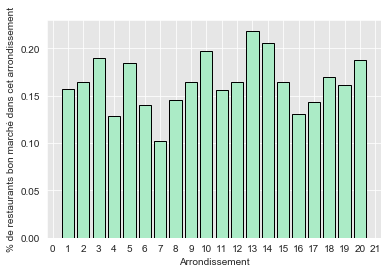

In [15]:
effectif_cheap = parisiens_cheap.groupby('arr').aggregate({'arr' : 'count'})['arr']
#On compte par arrondissement le nombre de restaurants bon marché
arrondissements_cheap = range(1,21)

ax = plt.axes()
plt.xlabel("Arrondissement")
plt.ylabel("% de restaurants bon marché dans cet arrondissement")
ax.xaxis.set_major_locator(MultipleLocator(1)) 
#Sert à choisir une graduation de 1, afin de représenter clairement chaque arrondissement
plt.bar(arrondissements_cheap,effectif_cheap/effectif_total_par_arr, color = "#ABEBC6", 
                                                                     edgecolor="black",
                                                                     linewidth=1, 
                                                                     ecolor = "green",
                                                                     capsize = 10)

Les restaurants bon marché sont les plus représentés dans le 10ème, le 13ème et le 14ème arrondissement. Ils font partie des arrondissements avec le niveau de vie le plus bas. Ainsi, les habitants sont moins riches et les restaurants là-bas sont moins chers. En effet, ce graphique a une allure semblable à celui représentant le nombre de restaurants émeraude par arrondissement :

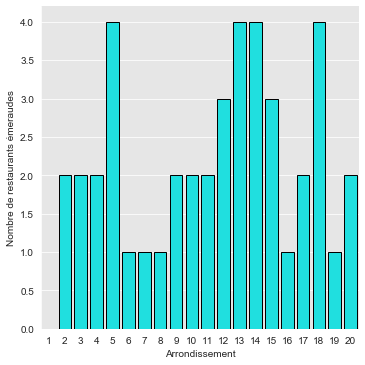

In [16]:
df = parisiens.rename(columns = {'arr' : 'Arrondissement', 'nb_emeraudes' : 'Nombre de restaurants émeraudes'})
sns.catplot(x='Arrondissement', y='Nombre de restaurants émeraudes', edgecolor="black", data=df, kind = "bar", color = "cyan")

Plus un arrondissement a de restaurants émeraudes, plus ses habitants sont dans le besoin et donc moins ils sont riches. Ainsi, plus les prix pratiqués par les restaurants de cet arrondissement sont bas. 

#### Version cartographique (pour ceux qui savent reconnaître les arrondissements visuellement) :

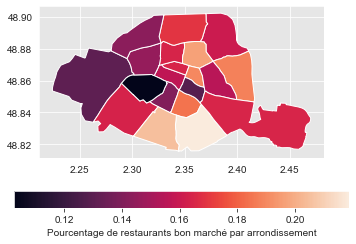

In [17]:
arrondissements = gpd.read_file("https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr")
# Fond de carte des arrondissements parisiens trouvé sur internet
arrondissements['l_ar'] = arrondissements['l_ar'].str.extract('(\d+)').astype(int)
arrondissements = arrondissements.rename(columns = {'l_ar' : 'arr'})
# On recode la colonne 'l_ar' représentant l'arrondissement pour pouvoir faire une fusion avec notre
# base de données ensuite.

df = parisiens_cheap.groupby('arr').aggregate({'name' : 'count'}).reset_index()
# Par arrondissement, on compte le nombre de restaurants dans la base "cheap"
df2 = parisiens.groupby('arr').aggregate({'name' : 'count'}).reset_index()
# Par arrondissement, on compte le nombre de restaurants dans la base de données entière
df['name'] = df['name']/df2['name']
# Ici, df est donc un dataframe qui recense par arrondissement le pourcentage de restaurants chers

arrondissements.merge(df, how='inner').plot(column = 'name',
                                            legend = True, 
                                            legend_kwds={'label': "Pourcentage de restaurants bon marché par arrondissement", 
                                                         'orientation': "horizontal"})

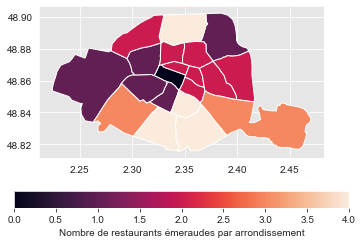

In [18]:
df = parisiens.drop_duplicates(subset = ['arr'])
# On garde juste un restaurant par arrondissement pour avoir le nombre de restaurants émeraudes
# par arrondissement.

arrondissements.merge(df, how='inner').plot(column = 'nb_emeraudes',
                                            legend = True, 
                                            legend_kwds={'label': "Nombre de restaurants émeraudes par arrondissement", 
                                                         'orientation': "horizontal"})

### Restaurants de catégorie de prix modérée

<BarContainer object of 20 artists>

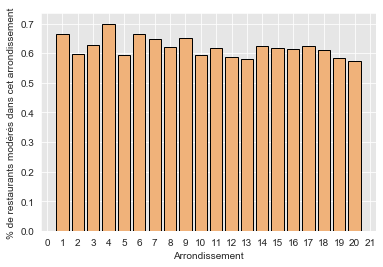

In [19]:
effectif_average = parisiens_average.groupby('arr').aggregate({'arr' : 'count'})['arr']
arrondissements_average = range(1,21)

ax = plt.axes()
plt.xlabel("Arrondissement")
plt.ylabel("% de restaurants modérés dans cet arrondissement")
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.bar(arrondissements_average,effectif_average/effectif_total_par_arr, color = "#F0B27A", 
                                                                         edgecolor="black",
                                                                         linewidth=1, 
                                                                         ecolor = "green",
                                                                         capsize = 10)

Le niveau de représentation des restaurants de catégorie de prix modérée est quasiment le même dans tous les arrondissements : ce graphique nous aide à dégager aucune information.

### Restaurants chers

<BarContainer object of 20 artists>

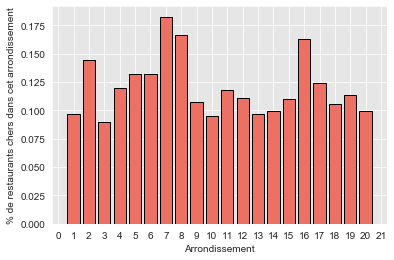

In [20]:
effectif_expensive = parisiens_expensive.groupby('arr').aggregate({'arr' : 'count'})['arr']
arrondissements_expensive = range(1,21)

ax = plt.axes()
plt.xlabel("Arrondissement")
plt.ylabel("% de restaurants chers dans cet arrondissement")
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.bar(arrondissements_expensive,effectif_expensive/effectif_total_par_arr, color = "#EC7063", edgecolor="black",linewidth=1, ecolor = "green",capsize = 10)

On peut voir que les restaurants chers sont les plus représentés dans le 7ème, le 8ème et le 16ème arrondissements. Ce sont les arrondissements où le niveau est le plus élevé. Ainsi, en conséquence, les restaurants présents là-bas s'adaptent à leur population et pratiquent des prix plus élevés.

Par ailleurs, ce dernier graphique coïncide plus ou moins avec le graphique gris ci-dessous représentant le niveau de vie moyen par arrondissement. Cela appuie le fait que plus un restaurant se situe dans un arrondissement aisé, plus il peut se permettre de pratiquer des prix élevés.

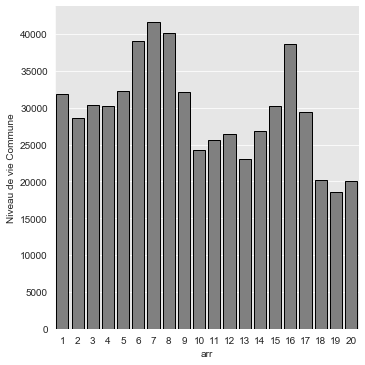

In [21]:
sns.catplot(x='arr', y='Niveau de vie Commune', edgecolor="black", data=parisiens, kind = "bar", color = "grey")

#### Version cartographique (pour ceux qui savent reconnaître les arrondissements visuellement) :

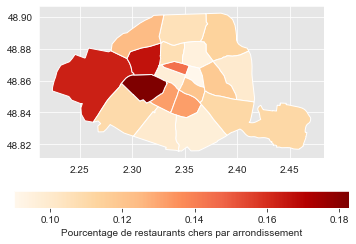

In [22]:
df = parisiens_expensive.groupby('arr').aggregate({'name' : 'count'}).reset_index()

df2 = parisiens.groupby('arr').aggregate({'name' : 'count'}).reset_index()
# Par arrondissement, on compte le nombre de restaurants dans la base de données entière
df['name'] = df['name']/df2['name']
# Ici, df est donc un dataframe qui recense par arrondissement le pourcentage de restaurants chers

# Par arrondissement on compte le nombre de restaurants dans la base "expensive"
arrondissements.merge(df, how='inner').plot(column = 'name',
                                            cmap='OrRd',
                                            legend = True, 
                                            legend_kwds={'label': "Pourcentage de restaurants chers par arrondissement", 
                                                         'orientation': "horizontal"})

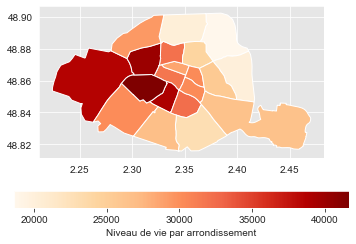

In [23]:
df = parisiens.drop_duplicates(subset = ['arr'])
# On garde juste un restaurant par arrondissement pour avoir le niveau de vie par arrondissement.

arrondissements.merge(df, how='inner').plot(column = 'Niveau de vie Commune',
                                            cmap='OrRd',
                                            legend = True, 
                                            legend_kwds={'label': "Niveau de vie par arrondissement", 
                                                         'orientation': "horizontal"})

## Etude avec la variable "Prix moyen" pour avoir les idées plus claires avec des prix en chiffres

### Prix moyen par arrondissement

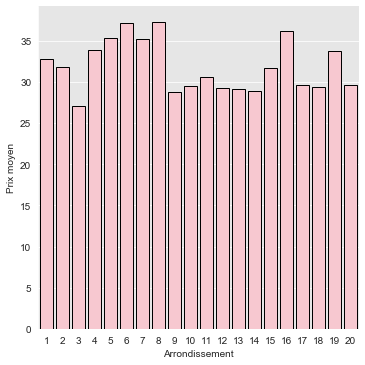

In [24]:
df = parisiens.groupby('arr').aggregate({'Prix moyen' : 'mean'}).reset_index()
df = df.rename(columns = {'arr' : 'Arrondissement'})
sns.catplot(x='Arrondissement', y='Prix moyen', edgecolor="black", data=df, kind = "bar", color = "pink")

Le graphique ci-dessus représente le prix moyen d'un restaurant selon son arrondissement. Il a une allure similaire au graphique rouge précédent représentant le pourcentages de restaurants chers par arrondissement, sauf pour le 19ème arrondissement, où l'on observe un prix moyen parmi les plus élevés. Cela peut s'expliquer par le fait que dans cet arrondissements, les restaurants sur lesquels on a pu trouver des informations quantitatives sur le prix sont essentiellement des restaurants chers.  

#### Version cartographique (pour ceux qui savent reconnaître les arrondissements visuellement) :

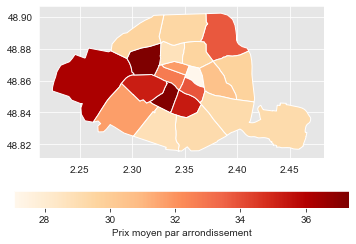

In [25]:
df = parisiens.groupby('arr').aggregate({'Prix moyen' : 'mean'}).reset_index()
arrondissements.merge(df, how='inner').plot(column = 'Prix moyen',
                                            cmap='OrRd',
                                            legend = True, 
                                            legend_kwds={'label': "Prix moyen par arrondissement", 
                                                         'orientation': "horizontal"})

L'allure de cette carte est très semblable à celle des deux cartes précédentes : prix moyen est donc bien corrélé avec arrondissement et niveau de vie dans cet arrondissement.

### Date de création du restaurant et prix moyen

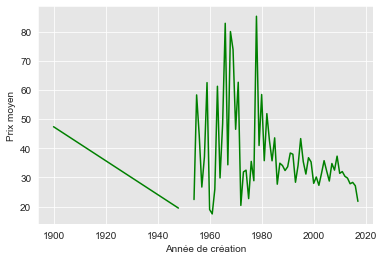

In [26]:
df = parisiens.groupby('foundingYear').aggregate({'Prix moyen' : 'mean'}).reset_index()
df = df.rename(columns = {'foundingYear' : 'Année de création'})
sns.lineplot(x='Année de création', y='Prix moyen', data=df, color = "green")
#On choisit ici le lineplot pour représenter la continuité dans le temps

Dans le graphique ci-dessus, on a représenté la moyenne de prix d'un restaurant par rapport à son année de création. On n'observe aucune tendance générale, on peut donc se dire que l'ancienneté d'un restaurant n'a rien à voit avec les prix pratiqués dans ce dernier.

### Style de cuisine et prix moyen

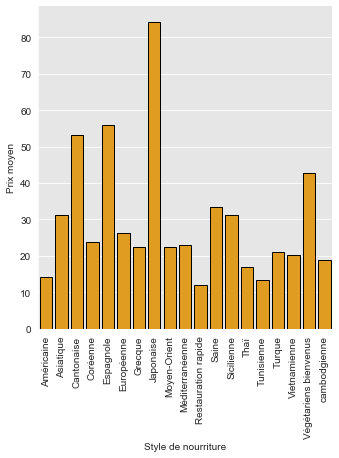

In [27]:
df = parisiens.groupby('Style de nourriture').aggregate({'Prix moyen' : 'mean'}).reset_index()
g = sns.catplot(x='Style de nourriture', y='Prix moyen', edgecolor="black", data=df, kind = "bar", color = "orange")
g.set_xticklabels(rotation=90) #Pour ne pas que les intitulés se chevauchent

Dans la vie quotidienne, certaines cuisines sont réputées pour être plus ou moins chères que d'autres. Souvent, le fast-food et la cuisine d'Asie du Sud-Est sont les moins chers. C'est ce que l'on peut observer sur notre graphique.

Cependant, on peut observer des prix moyens abérrants pour les cuisines Asiatique, Cantonaise, Espagnole et Japonaise. En effet, en allant sur les pages TripAdvisor de certains de nos restaurants hors de prix scrappés, on a pu voir que certaines catégories de cuisine ont été attribuées à tort par le site. En les éliminant, on obtient un graphique plus réaliste :

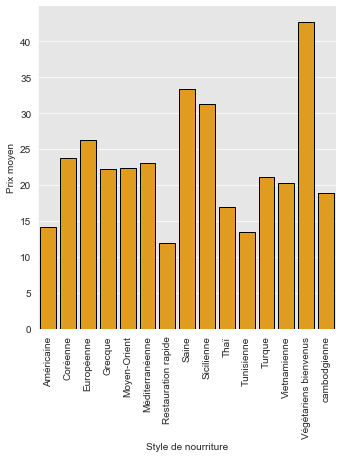

In [28]:
df = parisiens[parisiens['Style de nourriture'] != 'Asiatique']
df = df[df['Style de nourriture'] != 'Japonaise']
df = df[df['Style de nourriture'] != 'Cantonaise']
df = df[df['Style de nourriture'] != 'Espagnole']
df = df.groupby('Style de nourriture').aggregate({'Prix moyen' : 'mean'}).reset_index()
g = sns.catplot(x='Style de nourriture', y='Prix moyen', edgecolor="black", data=df, kind = "bar", color = "orange")
g.set_xticklabels(rotation=90) #Pour ne pas que les intitulés se chevauchent

### Taille d'entreprise et prix moyen

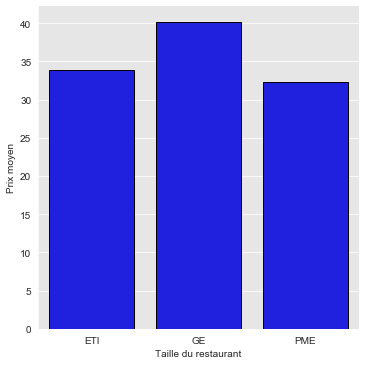

In [29]:
df = parisiens.groupby('categorySize').aggregate({'Prix moyen' : 'mean'}).reset_index()
df = df.rename(columns = {'categorySize' : 'Taille du restaurant'})
sns.catplot(x='Taille du restaurant', y='Prix moyen', edgecolor="black", data=df, kind = "bar", color = "blue")

Les restaurants considérés comme grandes entreprises sont les plus chers : en effet, ils ont plus de personnel à payer, et ont une plus grande notoriété. Ils pratiquent alors des prix plus élevés. 

Le prix moyen dans les restaurants considérés comme entreprises de taille moyenne et petites et moyennes entreprises est proche car encore une fois, la frontière entre ces deux catégories est floue. 

### Capital social et prix moyen

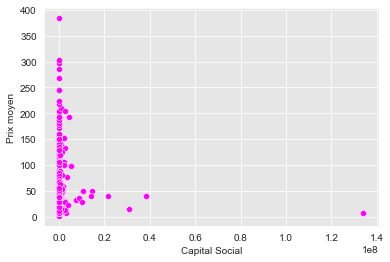

In [30]:
sns.scatterplot(x='Capital Social', y='Prix moyen', data=parisiens, color = "magenta")
# Je sais pas comment on commente ça lol

Que dire ?

## Coefficients de corrélation

In [31]:
parisiens.corr()['Prix moyen'].reset_index()

,index,Prix moyen
0,legalImmat,-7.787044e-02
1,streetNumber,-2.394695e-02
2,Code Postal,-2.695972e-02
3,isHeadquarters,1.295967e-02
4,employeesNb,-2.456861e-02
5,foundingYear,-9.280199e-02
6,dep,NaN
7,Code INSEE,-2.695972e-02
8,Altitude Moyenne,-3.021964e-02
9,Superficie,3.662346e-03


Les signes des coefficients de corrélation sont en adéquation avec les analyses faites avant. Les variables explicatives les plus corrélées avec 'Prix moyen' sont 'Nombre avis', 'Note qualité-prix', 'Note ambiance' et 'Note de cuisine'. On peut donc se dire que ce sont les variables les plus déterminantes du prix d'un repas dans un restaurant parisien. 